In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1


In [2]:
from sklearn.metrics import r2_score, mean_squared_error
from DataPrep.load_data import load_data
import pyforest

In [6]:
df = pd.read_csv("data\createdDat\Censorship_scheem\df_censored.csv")

df["Start Date"] = pd.to_datetime(df["Start Date"])
df = df.set_index("Start Date")

df1 = load_data()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

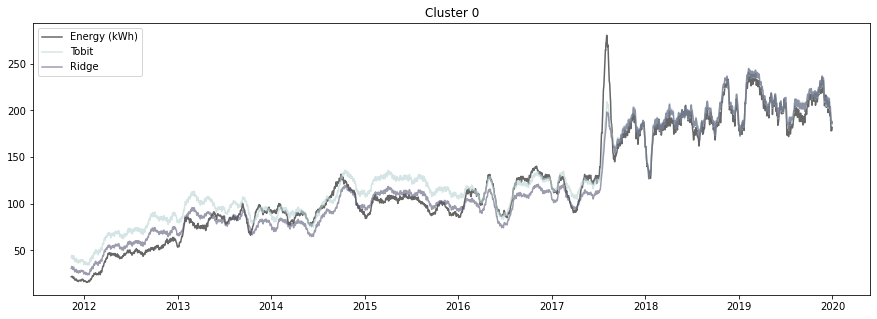

r^2 score: 0.8124761030920093


<IPython.core.display.Javascript object>

RMSE: 31.20090595525209


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

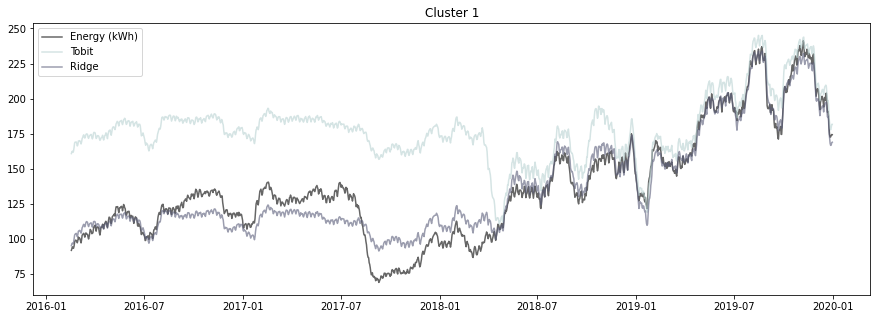

r^2 score: 0.14338279522396413


<IPython.core.display.Javascript object>

RMSE: 56.58189963938733


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

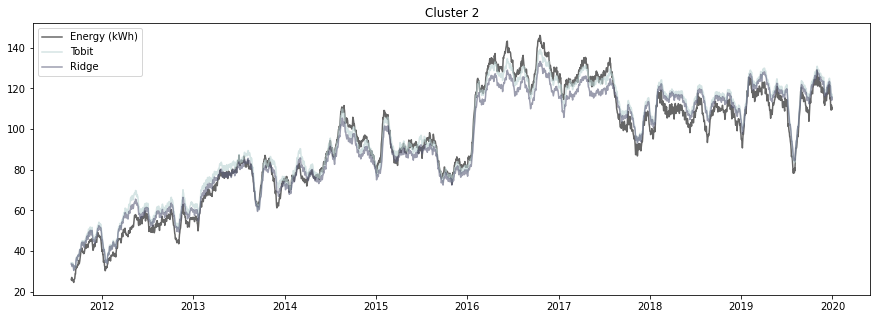

r^2 score: 0.6581537634043373


<IPython.core.display.Javascript object>

RMSE: 21.789073688029365


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

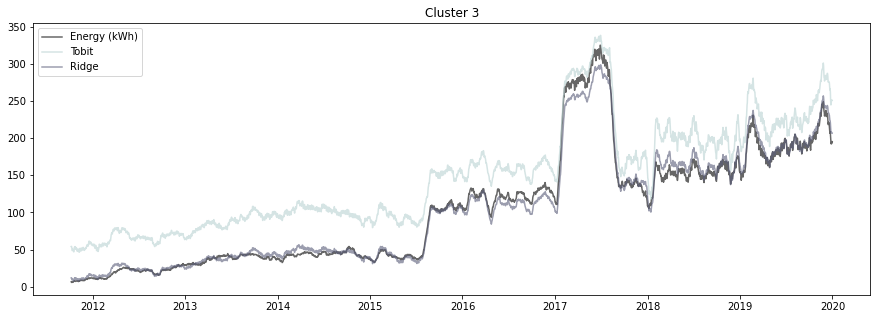

r^2 score: 0.5639311103773952


<IPython.core.display.Javascript object>

RMSE: 58.033213818396376


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

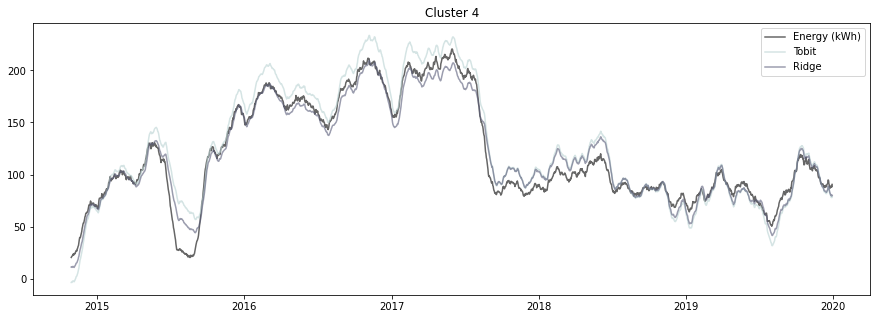

r^2 score: 0.714168450778371


<IPython.core.display.Javascript object>

RMSE: 31.55575444157007


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

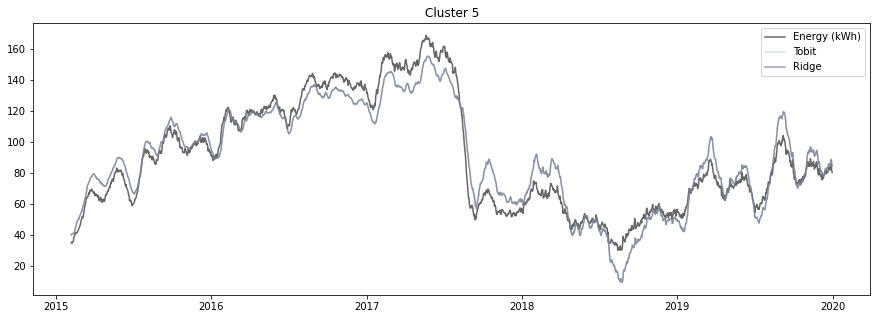

r^2 score: 0.5265972591175714


<IPython.core.display.Javascript object>

RMSE: 32.0434013135904


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

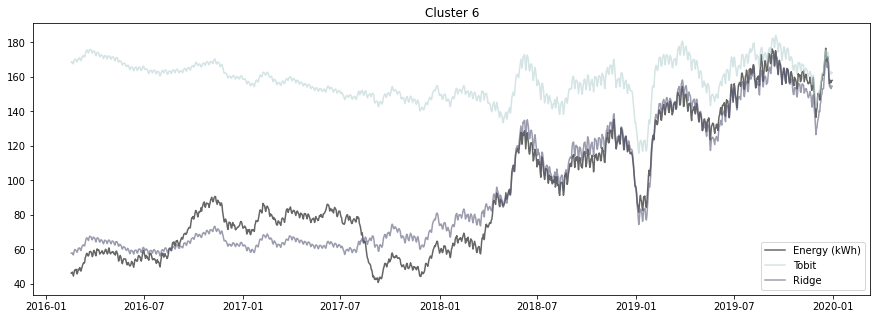

r^2 score: -0.7154989963376561


<IPython.core.display.Javascript object>

RMSE: 75.26624046921107


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

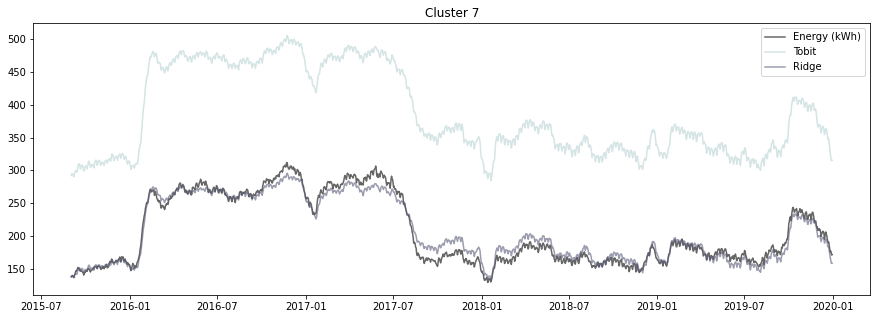

r^2 score: -4.808605497835504


<IPython.core.display.Javascript object>

RMSE: 184.57563992967906


In [100]:
cmap = plt.cm.bone
rmap = plt.cm.Reds
bmap = plt.cm.YlGn

censored_from = pd.to_datetime(['2017-07-04','2018-03-22','2011-08-01', '2017-01-05', '2014-10-04', '2015-01-01', '2018-03-22', '2016-01-13'])
size=5
for label in range(8):
    pred = pd.read_csv(f"data\createdDat\Censorship_scheem\Tobit_c_censor_label{label}.csv")
    test_df = df[df["Label"]==label]
    test_df = test_df[-len(pred):]
    pred = pred.set_index(test_df.index)
    plt.figure(figsize=(15,5))
    #pd.DataFrame([test_df["Energy (kWh)_y"],pred["Tobit_pred"],pred["Ridge_pred"]]).plot.area(stacked=False)
    plt.plot(test_df.index,test_df["Energy (kWh)_x"].rolling(window=30,min_periods=30).mean(), alpha = 0.6,  label = "Energy (kWh)",color=cmap(1))
    plt.plot(pred["Tobit_pred"].rolling(window=30,min_periods=30).mean(), alpha = 0.6,label = "Tobit",color=cmap(0.8))
    plt.plot(pred["Ridge_pred"].rolling(window=30, min_periods=30).mean(), alpha=0.6 ,label = "Ridge",color=cmap(0.4))
    #plt.vlines(censored_from[label], label="Censored from", ymin=0, ymax=pred["Tobit_pred"].max())
    plt.title(f"Cluster {label}")
    plt.legend()
    plt.show()
    print(f'r^2 score: {r2_score(test_df["Energy (kWh)_x"],pred["Tobit_pred"])}')
    print(f'RMSE: {np.sqrt(mean_squared_error(test_df["Energy (kWh)_x"],pred["Tobit_pred"]))}')

In [32]:
plt.stackplot([test_df["Energy (kWh)_x"],pred["Tobit_pred"],pred["Ridge_pred"]])
plt.show()

<IPython.core.display.Javascript object>

ValueError: need at least one array to concatenate

In [36]:
pred["Tobit_pred"]

0        23.093334
1       -12.240811
2        61.662535
3        42.740030
4        48.270712
           ...    
2995    120.455184
2996     32.161128
2997     23.556770
2998    120.201444
2999    136.586312
Name: Tobit_pred, Length: 3000, dtype: float64